In [1]:
# Importing required libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose 

#lOADING THE DATASET
#Bit-CoinData= r'C:\Users\user\path\bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv'
Bit_data = pd.read_csv(r'C:\Users\user\path\bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv') 

Bit_data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4572252,1600041360,10324.35,10325.89,10324.35,10325.89,0.081143,837.754188,10324.419779
4572253,1600041420,10331.41,10331.97,10326.68,10331.97,0.572817,5918.028741,10331.444396
4572254,1600041480,10327.20,10331.47,10321.33,10331.47,2.489909,25711.238323,10326.175283
4572255,1600041540,10330.02,10334.78,10328.64,10334.78,4.572660,47253.747619,10333.972651


In [2]:
#CONVERTING THE TIMESTAMP TO A DATETIME FORMAT
Bit_data['time']=pd.to_datetime(Bit_data['Timestamp'], unit='s')
Time_stamp = pd.DataFrame(Bit_data['time'])
Time_stamp

,time
0,2011-12-31 07:52:00
1,2011-12-31 07:53:00
2,2011-12-31 07:54:00
3,2011-12-31 07:55:00
4,2011-12-31 07:56:00
...,...
4572252,2020-09-13 23:56:00
4572253,2020-09-13 23:57:00
4572254,2020-09-13 23:58:00
4572255,2020-09-13 23:59:00


In [3]:
#CONCATENATING THE NEW DATETIME COLUMN WITH THE DATASET AND COVERTING THE DATASET TO A TIME INDEX DATAFRAME
New_Data = Bit_data[['Open', 'High', 'Low', 'Close', 'Volume_(BTC)','Volume_(Currency)','Weighted_Price']]
New_Data = pd.concat([New_Data,Time_stamp], axis=1, sort=False)
New_Data.set_index( "time" , inplace= True )

New_Data

In [4]:
#SCOOPING ONLY THE HIGH COLUMN FROM THE DATASET BY SLICING THROUGH THE DATA
New_Data= pd.DataFrame(New_Data['High'])
New_Data

,High
time,
2011-12-31 07:52:00,4.39
2011-12-31 07:53:00,NaN
2011-12-31 07:54:00,NaN
2011-12-31 07:55:00,NaN
2011-12-31 07:56:00,NaN
...,...
2020-09-13 23:56:00,10325.89
2020-09-13 23:57:00,10331.97
2020-09-13 23:58:00,10331.47


In [5]:
#fORWARD FILLING OF NULL VALUE 
Time_High= New_Data.fillna(method ='ffill')
Time_High

,High
time,
2011-12-31 07:52:00,4.39
2011-12-31 07:53:00,4.39
2011-12-31 07:54:00,4.39
2011-12-31 07:55:00,4.39
2011-12-31 07:56:00,4.39
...,...
2020-09-13 23:56:00,10325.89
2020-09-13 23:57:00,10331.97
2020-09-13 23:58:00,10331.47


In [6]:
#DOWNSAMPLING THE DATASET
New_Data = New_Data.resample( '3M' ).mean()
New_Data

,High
time,
2011-12-31,4.482500
2012-03-31,5.479719
2012-06-30,5.589126
2012-09-30,10.332271
2012-12-31,11.989673
2013-03-31,43.044929
2013-06-30,117.846809
2013-09-30,104.839017
2013-12-31,517.139101


In [7]:
#Checking the null value
New_Data.isnull().sum()

High    0
dtype: int64

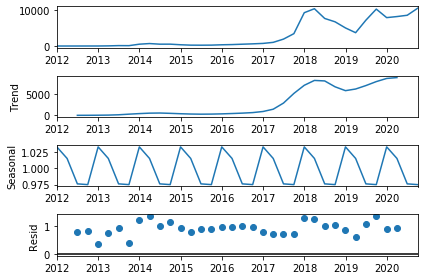

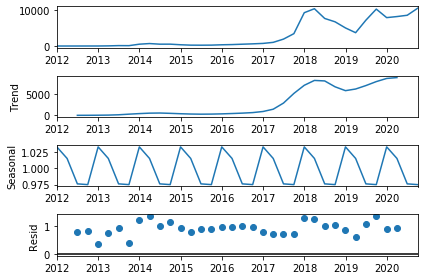

In [8]:
#ETS Decomposition 
result1 = seasonal_decompose(New_Data, model ='multiplicative') 
  
#ETS plot  
result1.plot() 

Text(0, 0.5, 'High')

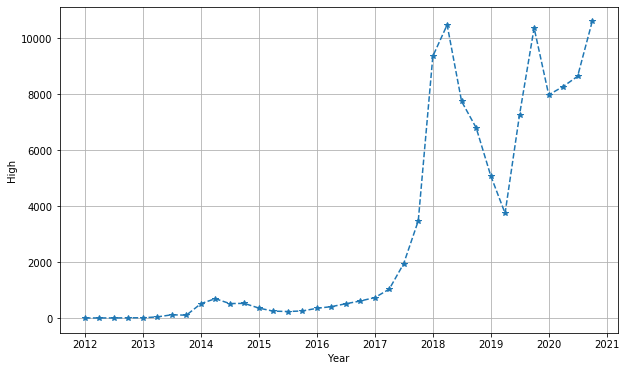

In [9]:
#iewing the behaviour of High Column Data
plt.figure(figsize=( 10 , 6 ))
plt.plot(New_Data.index, New_Data.High, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'High' )

In [15]:
# Import the library 
from pmdarima import auto_arima 
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 

# Fit auto_arima function to High dataset 
stepwise_fit = auto_arima(New_Data[['High']], start_p = 1, start_q = 1, 
                        max_p = 3, max_q = 3, m = 10, 
                        start_P = 0, seasonal = True, 
                        d = None, D = 1, trace = True, 
                        error_action ='ignore', # we don't want to know if an order does not work 
                        suppress_warnings = True, # we don't want convergence warnings 
                        stepwise = True) # set to stepwise 

# To print the summary
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[10] intercept   : AIC=inf, Time=1.99 sec
 ARIMA(0,0,0)(0,1,0)[10] intercept   : AIC=500.760, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[10] intercept   : AIC=472.709, Time=1.01 sec
 ARIMA(0,0,1)(0,1,1)[10] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(0,0,0)(0,1,0)[10]             : AIC=512.819, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[10] intercept   : AIC=475.835, Time=0.26 sec
 ARIMA(1,0,0)(2,1,0)[10] intercept   : AIC=474.358, Time=1.70 sec
 ARIMA(1,0,0)(1,1,1)[10] intercept   : AIC=inf, Time=1.33 sec
 ARIMA(1,0,0)(0,1,1)[10] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(1,0,0)(2,1,1)[10] intercept   : AIC=inf, Time=1.47 sec
 ARIMA(0,0,0)(1,1,0)[10] intercept   : AIC=501.327, Time=0.25 sec
 ARIMA(2,0,0)(1,1,0)[10] intercept   : AIC=472.717, Time=0.43 sec
 ARIMA(1,0,1)(1,1,0)[10] intercept   : AIC=472.094, Time=0.39 sec
 ARIMA(1,0,1)(0,1,0)[10] intercept   : AIC=475.342, Time=0.06 sec
 ARIMA(1,0,1)(2,1,0)[10] intercept   : AIC=473.538, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   36
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 10)   Log Likelihood                -231.047
Date:                             Fri, 02 Oct 2020   AIC                            472.094
Time:                                     19:25:32   BIC                            478.384
Sample:                                          0   HQIC                           473.905
                                              - 36                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    882.8312   1798.542      0.491      0.624   -2642.246    4407.908
ar.L1          0.7754      0.268      2.895      0.004       0.250       1.300
ma.L1          0.4131      0.257      1.606      0.108      -0.091       0.917
ar.S.L10      -0.5900      0.284     -2.076      0.038      -1.147      -0.033
sigma2      2.938e+06   1.19e+06      2.463      0.014       6e+05    5.28e+06
===================================================================================
Ljung-Box (Q):                        9.63   Jarque-Bera (JB):                14.63
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              10.07   Skew:                             1.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
#Sliting into train and test data
train = New_Data['31/12/2011':'31/12/2018']
test = New_Data['31/03/2019':'30/09/2020']

In [17]:
# Split data into train / test sets
from pmdarima import auto_arima 
train = New_Data.iloc[0:26,:]
test = New_Data.iloc[26:,:] # set one year(10 months) for testing 

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 10) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 

model = SARIMAX(train['High'], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 10)) 

result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               High   No. Observations:                   26
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 10)   Log Likelihood                -130.881
Date:                            Fri, 02 Oct 2020   AIC                            271.761
Time:                                    19:25:34   BIC                            275.301
Sample:                                12-31-2011   HQIC                           271.724
                                     - 03-31-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4049      0.655      0.618      0.536      -0.879       1.688
ar.S.L10       0.7918   5098.292      0.000      1.000   -9991.677    9993.260
ar.S.L20       0.0388    343.476      0.000      1.000    -673.162     673.239
ma.S.L10      -0.8434   5099.186     -0.000      1.000   -9995.065    9993.378
sigma2      2.216e+06     11.118   1.99e+05      0.000    2.22e+06    2.22e+06
===================================================================================
Ljung-Box (Q):                        2.40   Jarque-Bera (JB):                50.15
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):             796.34   Skew:                             2.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.31e+21. Standard errors may be unstable.
"""

In [18]:
start = len(train) 
end = len(train) + len(test) - 1

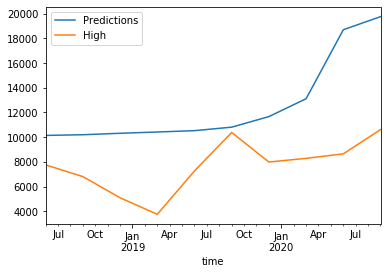

In [19]:
# Predictions for 10 months against the test set 
predictions = result.predict(start, end, typ = 'levels').rename("Predictions") 

# plot predictions and actual values 
predictions.plot(legend = True) 

test['High'].plot(legend = True) 

In [20]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

# Calculate root mean squared error 
print(rmse(test["High"], predictions)) 

# Calculate mean squared error 
mean_squared_error(test["High"], predictions) 

5669.6158526671725


32144543.916814905

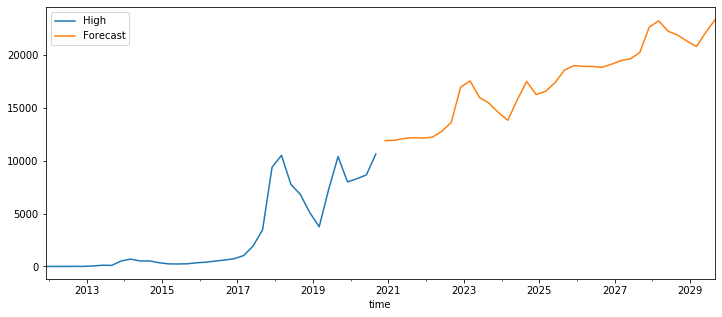

In [21]:
# Train the model on the full dataset 
from scipy.stats import norm
from pmdarima import auto_arima 
model = model = SARIMAX(New_Data, 
                        order = (0, 1, 1), 
                        seasonal_order =(2, 1, 1, 10)) 
result = model.fit() 

# Forecast for the next 3 years 
forecast = result.predict(start = len(New_Data), 
                        end = (len(New_Data)-1) + 3 * 12, 
                        typ = 'levels').rename('Forecast') 

# Plot the forecast values 
New_Data.plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 